In [3]:
from PIL import Image, ImageDraw, ImageFont

# Create a blank image
img = Image.new('RGBA', (2000, 2000), (255, 255, 255, 0))

# Create a draw object
draw = ImageDraw.Draw(img)

# Load a TrueType or OpenType font file, and create a font object.
# This is built-in font for PIL. For other fonts, you have to specify the font path.
font = ImageFont.truetype('arial.ttf', 800)

# List of characters to generate
characters = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!@#$%^&()')

# Size of outline
outline_size = 1

# RGB colors
text_color = (255, 255, 255, 255)  # Black color
outline_color = (0, 0, 0, 255)  # White color

# Loop through each character and generate the image
for char in characters:
    # Create a blank image for the character
    char_img = Image.new('RGBA', (2000, 2000), (255, 255, 255, 0))
    char_draw = ImageDraw.Draw(char_img)

    # Calculate text position
    width, height = char_draw.textsize(char, font=font)
    text_x = (char_img.size[0] - width) / 2
    text_y = (char_img.size[1] - height) / 2

    # Draw outline
    for adj in range(-outline_size, outline_size + 1):
        char_draw.text((text_x + adj, text_y), char, fill=outline_color, font=font)
        char_draw.text((text_x, text_y + adj), char, fill=outline_color, font=font)

    # Draw text
    char_draw.text((text_x, text_y), char, fill=text_color, font=font)

    # Save the image
    char_img.save(f'outlined_letter_{char}.png')


In [6]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import math
num = 1
def distortion_fn(X, Y, R_sun):
    R = np.hypot(X, Y)
    G = 6.67430e-11
    M = 1.989e30
    c = 299792458
    R_einstein = np.sqrt(4 * 3*G * M / (c**2)) 
    inside_sun = R <= R_sun
    outside_sun = R > R_sun
    inside_ring = R <= R_einstein
    outside_ring = R > R_einstein
    distortion = np.where(outside_sun, 4 * num*G * M / (c**2 * R+1e-8), 0)
    distortion = np.where(inside_ring, 2 * R_einstein, distortion)
    distortion = np.where(outside_ring, distortion, np.sin(math.pi*X) * np.sin(Y))
    return distortion

def lens_distortion(img, distortion_fn, R_sun):
    w, h = img.size
    img_np = np.array(img)

    x = np.arange(w) - w/2
    y = h/2 - np.arange(h)
    dist_sun = 1.495979e+8
    X, Y = np.meshgrid(x, y)
    Theta = np.sqrt(X**2 + Y**2)

    D = distortion_fn(X,Y, R_sun)
    Xd = D*X/(Theta + 1e-8) - X
    Yd = D*Y/(Theta + 1e-8)- Y
    Xd = np.clip(Xd + w/2, 0, w-1).astype(int)
    Yd = np.clip(h/2 - Yd, 0, h-1).astype(int)

    distorted_img_np = np.zeros_like(img_np)
    mask = np.logical_and(img_np[..., 3] > 0, np.all(img_np[..., :3] == 0, axis=-1))
    distorted_img_np[Yd[mask], Xd[mask]] = img_np[mask]

    return Image.fromarray(distorted_img_np)

img = Image.new('RGBA', (2000, 2000), (255, 255, 255, 0))

draw = ImageDraw.Draw(img)
font = ImageFont.truetype('arial.ttf', 800)
characters = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!@#$%^&()')
outline_size = 1
text_color = (0, 0, 0, 255) 
outline_color = (255, 255, 255, 255)

for char in characters:
    char_img = Image.new('RGBA', (2000, 2000), (255, 255, 255, 0))
    char_draw = ImageDraw.Draw(char_img)

    width, height = char_draw.textsize(char, font=font)
    text_x = (char_img.size[0] - width) / 2
    text_y = (char_img.size[1] - height) / 2

    for adj in range(-outline_size, outline_size + 1):
        char_draw.text((text_x + adj, text_y), char, fill=outline_color, font=font)
        char_draw.text((text_x, text_y + adj), char, fill=outline_color, font=font)

    char_draw.text((text_x, text_y), char, fill=text_color, font=font)

    R_sun = char_img.size[0] / 8 
    distorted_char_img = lens_distortion(char_img, distortion_fn, R_sun)

    draw = ImageDraw.Draw(distorted_char_img)
#     draw.ellipse([(distorted_char_img.size[0] // 2 - 10, distorted_char_img.size[1] // 2 - 10), 
#                   (distorted_char_img.size[0] // 2 + 10, distorted_char_img.size[1] // 2 + 10)], 
#                  fill='red')
#     draw.ellipse([(distorted_char_img.size[0] // 2 - R_sun, distorted_char_img.size[1] // 2 - R_sun), 
#                   (distorted_char_img.size[0] // 2 + R_sun, distorted_char_img.size[1] // 2 + R_sun)], 
#                  outline='yellow', width=5)

#     draw.text((distorted_char_img.size[0] // 2 + 15, distorted_char_img.size[1] // 2 - 10), "Center", fill='red', font=ImageFont.truetype('arial.ttf', 50))
#     draw.text((distorted_char_img.size[0] // 2 + R_sun + 15, distorted_char_img.size[1] // 2 - 10), "R_sun", fill='yellow', font=ImageFont.truetype('arial.ttf', 50))

    distorted_char_img.save(f'distorted_outlined_{char}_{num}.png')


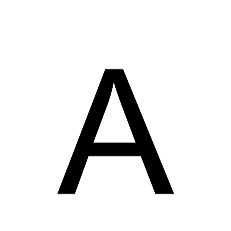

In [56]:
distorte_img = Image.open('letter_A.png')

# Display the image
plt.imshow(distorte_img)
plt.axis('off')  # remove the axis
plt.show()

In [1]:
import os

characters = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789!@#$%^&*()')

# Define your root directory where you want to create the folders
root_dir = './'

# Loop through each character and create a directory for it
for char in characters:
    # Use a try/except block to handle the case where the directory already exists
    try:
        # os.path.join combines the root directory with the character to create the full path
        os.mkdir(os.path.join(root_dir, char))
        print(f"Directory '{char}' created")
    except FileExistsError:
        print(f"Directory '{char}' already exists")


Directory 'A' created
Directory 'B' created
Directory 'C' created
Directory 'D' created
Directory 'E' created
Directory 'F' created
Directory 'G' created
Directory 'H' created
Directory 'I' created
Directory 'J' created
Directory 'K' created
Directory 'L' created
Directory 'M' created
Directory 'N' created
Directory 'O' created
Directory 'P' created
Directory 'Q' created
Directory 'R' created
Directory 'S' created
Directory 'T' created
Directory 'U' created
Directory 'V' created
Directory 'W' created
Directory 'X' created
Directory 'Y' created
Directory 'Z' created
Directory '0' created
Directory '1' created
Directory '2' created
Directory '3' created
Directory '4' created
Directory '5' created
Directory '6' created
Directory '7' created
Directory '8' created
Directory '9' created
Directory '!' created
Directory '@' created
Directory '#' created
Directory '$' created
Directory '%' created
Directory '^' created
Directory '&' created


OSError: [WinError 123] The filename, directory name, or volume label syntax is incorrect: './*'